In [170]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ulmo
%matplotlib inline

## [National Climatic Data Center Global Historical Climate Network Daily](https://www.ncdc.noaa.gov/ghcn-daily-description)

Ulmo has a function ulmo.ncdc.ghcn_daily.get_stations that can obtain information about stations available in GHCN dataset and also let you define some conditions for the search, like country, time span, and specific variables.

Country should be provided as a country code, and list of countries available [here](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-countries.txt). 

In [32]:
stations = ulmo.ncdc.ghcn_daily.get_stations(country='US', state='PA', as_dataframe=True)

In [33]:
stations.shape

(1256, 12)

In [34]:
stations.head()

,country,network,network_id,latitude,longitude,elevation,state,name,gsn_flag,hcn_flag,wm_oid,id
id,,,,,,,,,,,,
US1PAAD0002,US,1,PAAD0002,39.9192,-76.9894,139.0,PA,ABBOTTSTOWN 2.4 N,NaN,NaN,NaN,US1PAAD0002
US1PAAD0003,US,1,PAAD0003,40.0014,-77.1089,189.6,PA,YORK SPRINGS 0.7 SE,NaN,NaN,NaN,US1PAAD0003
US1PAAD0005,US,1,PAAD0005,39.8400,-77.2270,152.7,PA,GETTYSBURG 0.8 NNE,NaN,NaN,NaN,US1PAAD0005
US1PAAD0006,US,1,PAAD0006,39.8896,-77.3756,360.6,PA,ORRTANNA 3.2 NNW,NaN,NaN,NaN,US1PAAD0006
US1PAAD0007,US,1,PAAD0007,39.7293,-77.3673,150.0,PA,FAIRFIELD 4.0 S,NaN,NaN,NaN,US1PAAD0007


In [35]:
stations_connell = stations[stations.name.str.contains('CONNELLSVILLE')]
stations_connell.head()

,country,network,network_id,latitude,longitude,elevation,state,name,gsn_flag,hcn_flag,wm_oid,id
id,,,,,,,,,,,,
US1PAFY0013,US,1,PAFY0013,39.9960,-79.5788,399.9,PA,SOUTH CONNELLSVILLE 0.3 NE,NaN,NaN,NaN,US1PAFY0013
USC00361723,US,C,00361723,40.0167,-79.6000,265.2,PA,CONNELLSVILLE,NaN,NaN,NaN,USC00361723
USC00361726,US,C,00361726,39.9969,-79.5964,274.3,PA,CONNELLSVILLE 2 SSW,NaN,NaN,NaN,USC00361726
USC00361727,US,C,00361727,40.0000,-79.5833,323.1,PA,CONNELLSVILLE 3,NaN,NaN,NaN,USC00361727
USC00361728,US,C,00361728,40.0167,-79.5667,348.1,PA,CONNELLSVILLE 1 E,NaN,NaN,NaN,USC00361728


In [55]:
t = ulmo.ncdc.ghcn_daily.get_data('US1PAFY0013', as_dataframe=True)

In [88]:
t1 = pd.concat([t[x] for x in t.keys() if x in t],  keys=t.keys(), axis=1)
t1.head()

WESD                    PRCP                    SNOW        \
             value mflag qflag sflag value mflag qflag sflag value mflag   
month_period                                                               
2016-07-01     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2016-07-02     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2016-07-03     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2016-07-04     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2016-07-05     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                          SNWD                    WESF                    
             qflag sflag value mflag qflag sflag value mflag qflag sflag  
month_period                                                              
2016-07-01     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2016-07-02     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2016-07-03     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2016-07-04     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
2016-07-05     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN

In [90]:
def get_ghcd_daily(stations, elements=None):
    data = pd.DataFrame()
    for station in stations:
        station_data = ulmo.ncdc.ghcn_daily.get_data(station, as_dataframe=True)
        if elements is None:
            elements = station_data.keys()

        station_data = pd.concat([station_data[element] for element in station_data.keys()
                                  if element in station_data], keys=station_data.keys(), axis=1)
        station_data.insert(0, 'Station', station)
        data = pd.concat([data, station_data])
    return data

In [91]:
daily_connell = get_ghcd_daily(stations_connell.id.values)
daily_connell.head()

/Users/mac1/Library/Python/2.7/lib/python/site-packages/ulmo/ncdc/ghcn_daily/core.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  dataframe[column_name][dates] = element_df[col][months]


Station  WESD                    PRCP                    \
                          value mflag qflag sflag value mflag qflag sflag   
month_period                                                                
2016-07-01    US1PAFY0013   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2016-07-02    US1PAFY0013   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2016-07-03    US1PAFY0013   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2016-07-04    US1PAFY0013   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2016-07-05    US1PAFY0013   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

              SNOW  ...   WT05        WT04                    WT03        \
             value  ...  qflag sflag value mflag qflag sflag value mflag   
month_period        ...                                                    
2016-07-01     NaN  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2016-07-02     NaN  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2016-07-03     NaN  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2016-07-04     NaN  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2016-07-05     NaN  ...    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

                          
             qflag sflag  
month_period              
2016-07-01     NaN   NaN  
2016-07-02     NaN   NaN  
2016-07-03     NaN   NaN  
2016-07-04     NaN   NaN  
2016-07-05     NaN   NaN  

[5 rows x 85 columns]

In [106]:
daily_connell.shape

(34576, 85)

In [105]:
daily_mean = daily_connell['PRCP', 'value'].astype('float').resample('D').mean()
daily_mean.shape

(32658,)

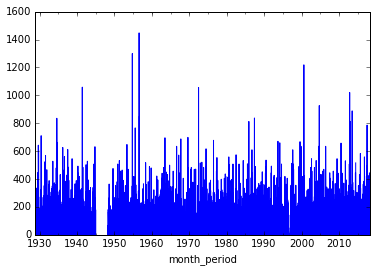

In [119]:
daily_mean.plot();

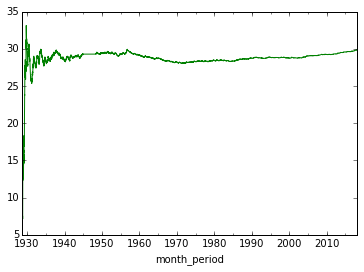

In [122]:
daily_mean.rolling('30D', min_periods=20).mean().plot(style='-g');

In [266]:
annual = daily_mean.resample('Y')
annual_count = annual.agg('count')
annual_total = annual.agg('sum')

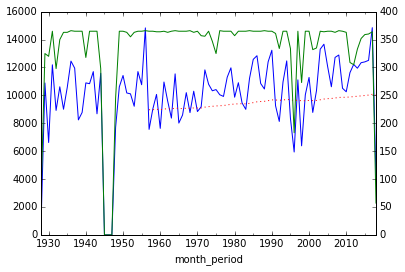

In [290]:
annual_total.plot(style='-b');
annual_count.plot(style='-g', secondary_y=True);
annual_total.rolling('10950D', min_periods=30).mean().plot(style=':r');

## [NASA EARTHDATA ORNL DAAC Daymet](https://daymet.ornl.gov/dataaccess.html)

In [2]:
variables = ulmo.nasa.daymet.get_variables()
variables

{'dayl': 'daylength',
 'prcp': 'precipitation',
 'srad': 'shortwave radiation',
 'swe': 'snow-water equivalent',
 'tmax': 'maximum temperature',
 'tmin': 'minimum temperature',
 'vp': 'vapor pressure'}

In [3]:
flooded = [40.0438, -79.5735]

In [4]:
connellsville = ulmo.nasa.daymet.get_daymet_singlepixel(*flooded, variables=['prcp'])

making request for latitude, longitude: 40.0438, -79.5735
processing data from request: https://daymet.ornl.gov/data/send/saveData?lat=40.0438&lon=-79.5735&measuredParams=prcp&lat=40.0438&lon=-79.5735&vars=prcp


In [5]:
connellsville.head()

,year,yday,prcp
1980-01-01,1980,1,0.0
1980-01-02,1980,2,0.0
1980-01-03,1980,3,0.0
1980-01-04,1980,4,0.0
1980-01-05,1980,5,2.0


In [6]:
connellsville.shape

(13505, 3)

In [7]:
connellsville.tail()

,year,yday,prcp
2016-12-26,2016,361,0.0
2016-12-27,2016,362,6.0
2016-12-28,2016,363,0.0
2016-12-29,2016,364,3.0
2016-12-30,2016,365,5.0


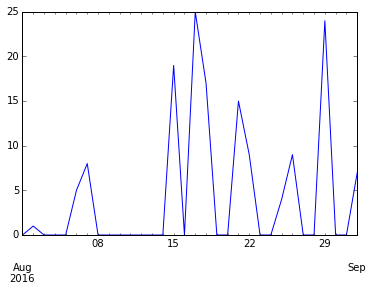

In [9]:
connellsville['2016-08-01':'2016-09-01']['prcp'].plot();